In [1]:
# 공통 처리

# 불필요한 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 한글 글꼴 설정
import platform

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    plt.rc('font', family='Apple Gothic')

# 데이터프레임 출력용 함수
from IPython.display import display

# 숫자 출력 조정
# 넘파이 부동소수점 출력 자리수 설정
np.set_printoptions(suppress=True, precision=4)

# 판다스 부동소수점 출력 자리수 설정
pd.options.display.float_format = '{:.4f}'.format

# 데이터프레임 모든 필드 출력
pd.set_option("display.max_columns",None)

# 그래프 글꼴 크기 설정
plt.rcParams["font.size"] = 14

# 난수 시드
random_seed = 123

In [2]:
# 데이터 필드 정보
# 1. instant 인덱스 dteday 날짜(yy-mm-dd)
# 2. season 계절 (1: 겨울 2: 봄 3: 여름 4: 가을)
# 3. yr 연도 (0: 2011, 1:2012)
# 4. mnth 월 (1 - 12)
# 5. hr 시간 (0 - 23)
# 6. holiday 휴일
# 7. weekday 요일 (0 - 6)
# 8. workingday 근무일 (1: 근무일 0: 휴일)
# 9. weathersit 날씨 (1: 맑은뒤흐림 2: 안개 3: 약한비 4: 강한비)
# 10. temp 기온 (정규화됨)
# 11. atemp 체감기온 (정규화됨)
# 12. hum 습도 (정규화됨)
# 13. windspeed 풍속 (정규화됨)
# 14. casual 비가입유저 이용수
# 15. registered 가입유저 이용수
# 16. cnt 전체유저 이용수

In [3]:
# Data import

In [4]:
# 데이터 집합 배포 페이지 URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip'

# 데이터를 내려받아 압축해제
!wget $url -O Bike-Sharing-Dataset.zip | tail -n 1
!unzip -o Bike-Sharing-Dataset.zip | tail -n 1

--2023-07-20 05:20:41--  https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘Bike-Sharing-Dataset.zip’

Bike-Sharing-Datase     [ <=>                ] 273.43K  --.-KB/s    in 0.1s    

2023-07-20 05:20:41 (2.51 MB/s) - ‘Bike-Sharing-Dataset.zip’ saved [279992]

  inflating: hour.csv                


In [5]:
# day.csv 파일을 데이터프레임으로 읽어들임
# 이때 날짜 필드를 parse_dates로 지정한다
df = pd.read_csv('day.csv', parse_dates=[1])

In [6]:
# instant 필드는 일련번호이므로 제거한다
df = df.drop('instant', axis=1)

# 우리말 필드명 정의

columns = [
    '날짜', '계절', '연도', '월', '휴일', '요일', '근무일', '날씨',
    '온도', '체감온도', '습도', '풍속',
    '비가입유저_이용수', '가입유저_이용수', '전체유저_이용수'
]

# 필드명을 우리말 필드명으로 변경
df.columns = columns

In [7]:
# 처음 다섯 줄을 화면에 출력
display(df.head())

# 마지막 다섯 줄을 화면에 출력
display(df.tail())

,날짜,계절,연도,월,휴일,요일,근무일,날씨,온도,체감온도,습도,풍속,비가입유저_이용수,가입유저_이용수,전체유저_이용수
0,2011-01-01,1,0,1,0,6,0,2,0.3442,0.3636,0.8058,0.1604,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.3635,0.3537,0.6961,0.2485,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.1964,0.1894,0.4373,0.2483,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.2000,0.2121,0.5904,0.1603,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.2270,0.2293,0.4370,0.1869,82,1518,1600


,날짜,계절,연도,월,휴일,요일,근무일,날씨,온도,체감온도,습도,풍속,비가입유저_이용수,가입유저_이용수,전체유저_이용수
726,2012-12-27,1,1,12,0,4,1,2,0.2542,0.2266,0.6529,0.3501,247,1867,2114
727,2012-12-28,1,1,12,0,5,1,2,0.2533,0.2550,0.5900,0.1555,644,2451,3095
728,2012-12-29,1,1,12,0,6,0,2,0.2533,0.2424,0.7529,0.1244,159,1182,1341
729,2012-12-30,1,1,12,0,0,0,1,0.2558,0.2317,0.4833,0.3508,364,1432,1796
730,2012-12-31,1,1,12,0,1,1,2,0.2158,0.2235,0.5775,0.1548,439,2290,2729


In [8]:
# 데이터 전처리

In [9]:
# '날짜'와 '가입사용자_이용수' 필드만 추출해
# 필드명을 '날짜'는 ds, '가입사용자_이용수'는 y로
# 바꾼 새 데이터프레임 df를 생성한다

# 데이터프레임 사본을 생성
df2 = df.copy()

# '날짜'와 '가입사용자_이용수' 필드를 추출
df2 = df2[['날짜', '가입유저_이용수']]

# 필드명을 교체
df2.columns = ['ds', 'y']

# 결과 확인
display(df2.head())

,ds,y
0,2011-01-01,654
1,2011-01-02,670
2,2011-01-03,1229
3,2011-01-04,1454
4,2011-01-05,1518


In [10]:
# 데이터 분할
# 데이터 분할은 간단하게 2012년 11월 1일을 기준으로 그 전의 데이터를 학습데이터 그 이후의 데이터는 검증 데이터로 삼는다.

In [11]:
# 분할 기준 날짜 mday
mday = pd.to_datetime('2012-11-1')

# 학습용 데이터의 index와 검증용 데이터의 index를 생성
train_index = df2['ds'] < mday
test_index = df2['ds'] >= mday

# 입력 데이터 분할
x_train = df2[train_index]
x_test = df2[test_index]

# 날짜 데이터 분할(그래프 출력용)
dates_test = df2['ds'][test_index]

In [12]:
# 라이브러리 임포트
#from fbprophet import Prophet
from prophet import Prophet

# 모델 결정
# seasonality 파라미터를 3으로 설정하는 것이 중요
# 이번 데이터는 일 단위 데이터이므로 daily_seasonality는 불필요함
# weekly_seasonality와 daily_seasonality는
# True/False 외의 값으로도 지정할 수 있음 (삼각함수의 개수)
# seasonality_mode: additive(기본값) multiplicative

m1 = Prophet(yearly_seasonality=True, weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode='multiplicative')

In [13]:
# 학습
m1.fit(x_train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpi9cs6hdo/5ii1uwon.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi9cs6hdo/v0he9utf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67888', 'data', 'file=/tmp/tmpi9cs6hdo/5ii1uwon.json', 'init=/tmp/tmpi9cs6hdo/v0he9utf.json', 'output', 'file=/tmp/tmpi9cs6hdo/prophet_model4bfxikdp/prophet_model-20230720052047.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:20:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:20:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [14]:
# 예측용 데이터 생성
# (날짜 필드 ds만 들어 있는 데이터프레임)
# 61은 예측을 원하는 기간의 일수(2012-11-1부터 2012-12-31까지) #Day를 뜻함
future1 = m1.make_future_dataframe(periods=61, freq='D')

# 결과 확인
display(future1.head())
display(future1.tail())

,ds
0,2011-01-01
1,2011-01-02
2,2011-01-03
3,2011-01-04
4,2011-01-05


,ds
726,2012-12-27
727,2012-12-28
728,2012-12-29
729,2012-12-30
730,2012-12-31


In [16]:
# 예측
# 결과로 데이터프레임이 반환된다
fcst1 = m1.predict(future1)

In [17]:
fcst1.to_csv("kaggle_time.csv", index = False)

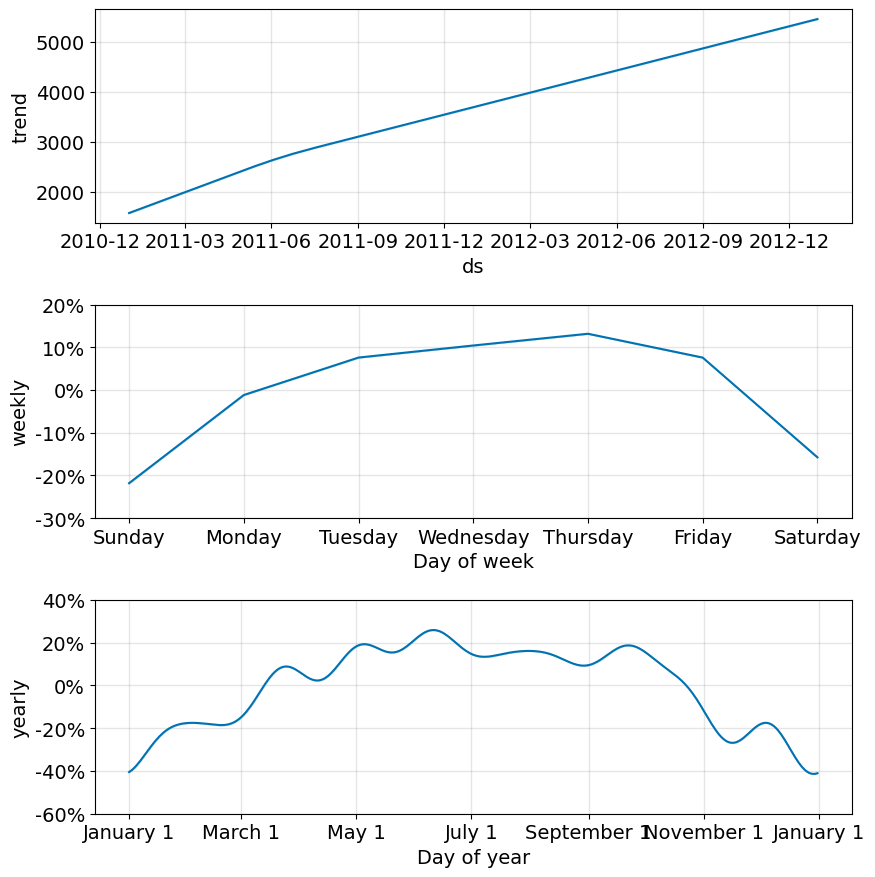

In [16]:
# 요소별 그래프 그리기
# 여기서는 트렌드, 주 단위 주기, 연 단위 주기
fig = m1.plot_components(fcst1)
plt.show()

In [18]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 17.9 MB/s eta 0:00:00


In [19]:
import koreanize_matplotlib

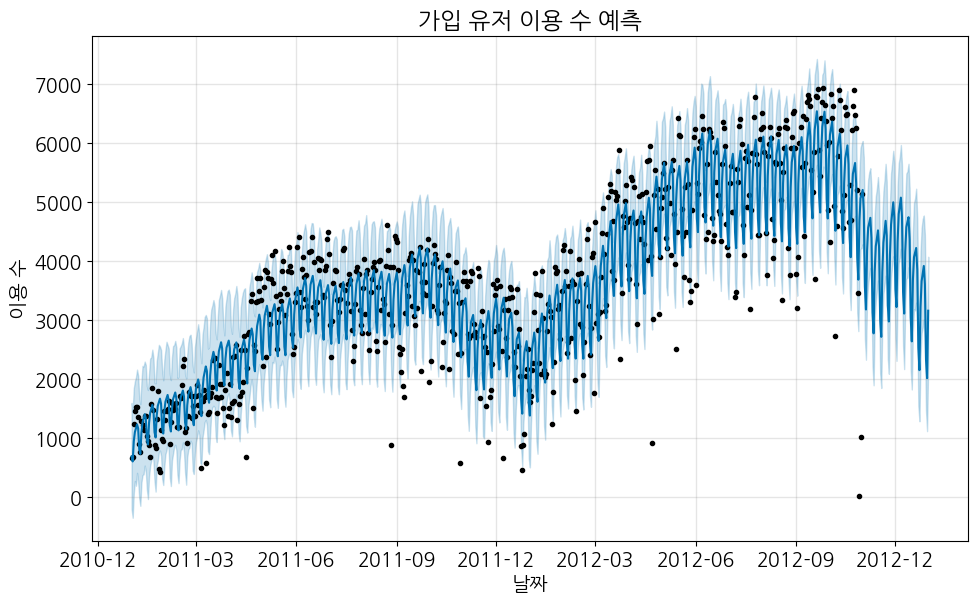

In [20]:
# 학습 데이터, 검증 데이터 전체를 그래프로 출력
fig, ax = plt.subplots(figsize=(10,6))

# 예측 결과를 그래프로 출력(프로펫 제공 함수)
m1.plot(fcst1, ax=ax)

# 제목 및 캡션 설정
ax.set_title('가입 유저 이용 수 예측')
ax.set_xlabel('날짜')
ax.set_ylabel('이용 수')

# 그래프 출력
plt.show()

In [22]:
# ypred1: fcst1에서 예측 부분만 추출
ypred1 = fcst1[-61:][['yhat']].values

# ytest1: 예측 기간 중의 정답 데이터
ytest1 = x_test['y'].values

# R2값을 계산
from sklearn.metrics import r2_score
score = r2_score(ytest1, ypred1)

# 결과 확인
print(f'R2 score:{score:.4f}')

R2 score:0.3736


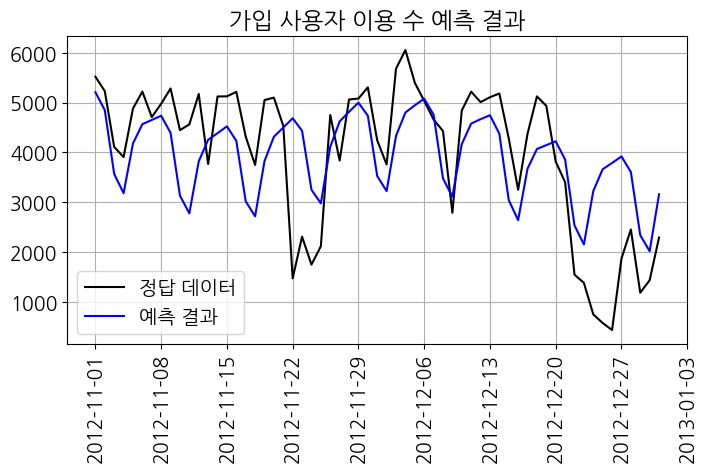

In [23]:
# 시계열 그래프 그리기
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(8, 4))

# 그래프 그리기
ax.plot(dates_test, ytest1, label='정답 데이터', c='k')
ax.plot(dates_test, ypred1, label='예측 결과', c='b')

# 날짜 눈금 표시
# 목요일마다 날짜를 출력한다
weeks = mdates.WeekdayLocator(byweekday=mdates.TH)
ax.xaxis.set_major_locator(weeks)

# 날짜 표기를 90도 기울임
ax.tick_params(axis='x', rotation=90)

# 그리드 그리기
ax.grid()
ax.legend()
ax.set_title('가입 사용자 이용 수 예측 결과')

# 그래프 출력
plt.show()

In [18]:
# 시계열 분석의 튜닝방법
# 1단계 : '휴일'의 영향을 반영
# 2단계 : 회귀 모델에 '날씨', '온도', '풍속', '습도'를 추가

In [19]:
# 휴일에 해당하는 날짜 추출
df_holiday = df[df['휴일']==1]
holidays = df_holiday['날짜'].values

# 데이터프레임으로 변환
df_add = pd.DataFrame({'holiday': 'holi',
    'ds': holidays,
    'lower_window': 0,
    'upper_window': 0
})

# 결과 확인
display(df_add.head())
display(df_add.tail())

,holiday,ds,lower_window,upper_window
0,holi,2011-01-17,0,0
1,holi,2011-02-21,0,0
2,holi,2011-04-15,0,0
3,holi,2011-05-30,0,0
4,holi,2011-07-04,0,0


,holiday,ds,lower_window,upper_window
16,holi,2012-09-03,0,0
17,holi,2012-10-08,0,0
18,holi,2012-11-12,0,0
19,holi,2012-11-22,0,0
20,holi,2012-12-25,0,0


In [20]:
# 휴일에 해당하는 날짜 추출
df_holiday = df[df['휴일']==1]
holidays = df_holiday['날짜'].values

# 데이터프레임으로 변환
df_add = pd.DataFrame({'holiday': 'holi',
    'ds': holidays,
    'lower_window': 0,
    'upper_window': 0
})

# 결과 확인
display(df_add.head())
display(df_add.tail())

,holiday,ds,lower_window,upper_window
0,holi,2011-01-17,0,0
1,holi,2011-02-21,0,0
2,holi,2011-04-15,0,0
3,holi,2011-05-30,0,0
4,holi,2011-07-04,0,0


,holiday,ds,lower_window,upper_window
16,holi,2012-09-03,0,0
17,holi,2012-10-08,0,0
18,holi,2012-11-12,0,0
19,holi,2012-11-22,0,0
20,holi,2012-12-25,0,0


In [21]:
# 휴일(df_add)을 모델에 반영하기

# 알고리즘 선택
# holidays 파라미터를 추가해 새로운 모델 m2를 생성한다
m2 = Prophet(yearly_seasonality=True,
    weekly_seasonality=True, daily_seasonality=False,
    holidays = df_add, seasonality_mode='multiplicative')

# 학습
m2 = m2.fit(x_train)

# 예측
fcst2 = m2.predict(future1)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpi9cs6hdo/3074arfz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi9cs6hdo/7ldr6cb9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40828', 'data', 'file=/tmp/tmpi9cs6hdo/3074arfz.json', 'init=/tmp/tmpi9cs6hdo/7ldr6cb9.json', 'output', 'file=/tmp/tmpi9cs6hdo/prophet_modelezgo_df4/prophet_model-20230720052153.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:21:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:21:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [22]:
# R2값 계산하기

# fcst2에서 예측 부분만을 추출
ypred2 = fcst2[-61:][['yhat']].values

# R2값 계산
score2 = r2_score(ytest1, ypred2)

# 결과 확인
r2_text2 = f'R2 score:{score2:.4f}'
print(r2_text2)

NameError: ignored

In [23]:
# 학습 데이터에 '날씨', '온도', '풍속', '습도'를 추가하기
df3 = pd.concat([df2, df[['날씨', '온도', '풍속', '습도']]], axis=1)

# 입력 데이터 분할
x2_train = df3[train_index]
x2_test = df3[test_index]

# 결과 확인
display(x2_train.tail())

,ds,y,날씨,온도,풍속,습도
665,2012-10-27,5209,2,0.5300,0.2357,0.7200
666,2012-10-28,3461,2,0.4775,0.3980,0.6946
667,2012-10-29,20,3,0.4400,0.3582,0.8800
668,2012-10-30,1009,2,0.3182,0.2130,0.8255
669,2012-10-31,5147,2,0.3575,0.1667,0.6667


In [24]:
# 알고리즘 선택

m3 = Prophet(yearly_seasonality=True,
    weekly_seasonality=True, daily_seasonality=False,
    seasonality_mode='multiplicative', holidays = df_add)

# add_regressor 함수를 이용해  '날씨', '온도', '풍속', '습도'를 모델에 추가
m3.add_regressor('날씨')
m3.add_regressor('온도')
m3.add_regressor('풍속')
m3.add_regressor('습도')

# 학습
m3.fit(x2_train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpi9cs6hdo/04e_a94m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi9cs6hdo/nm5am2ao.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30061', 'data', 'file=/tmp/tmpi9cs6hdo/04e_a94m.json', 'init=/tmp/tmpi9cs6hdo/nm5am2ao.json', 'output', 'file=/tmp/tmpi9cs6hdo/prophet_model0qte3tcb/prophet_model-20230720052214.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:22:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:22:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [25]:
# 예측용 입력 데이터 생성
future3 = df3[['ds', '날씨', '온도', '풍속', '습도']]

# 예측
fcst3 = m3.predict(future3)

In [27]:
fcst3

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,extra_regressors_multiplicative,extra_regressors_multiplicative_lower,extra_regressors_multiplicative_upper,holi,holi_lower,holi_upper,holidays,holidays_lower,holidays_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,날씨,날씨_lower,날씨_upper,습도,습도_lower,습도_upper,온도,온도_lower,온도_upper,풍속,풍속_lower,풍속_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2011-01-01,1515.1935,-160.2121,1195.7717,1515.1935,1515.1935,-0.2402,-0.2402,-0.2402,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.6696,-0.6696,-0.6696,-0.1537,-0.1537,-0.1537,-0.2757,-0.2757,-0.2757,-0.0766,-0.0766,-0.0766,-0.0720,-0.0720,-0.0720,-0.1082,-0.1082,-0.1082,0.0166,0.0166,0.0166,0.0000,0.0000,0.0000,500.6579
1,2011-01-02,1523.7453,-236.4638,1139.9300,1523.7453,1523.7453,-0.2314,-0.2314,-0.2314,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.7194,-0.7194,-0.7194,-0.2217,-0.2217,-0.2217,-0.2664,-0.2664,-0.2664,-0.0766,-0.0766,-0.0766,-0.0276,-0.0276,-0.0276,-0.0957,-0.0957,-0.0957,-0.0315,-0.0315,-0.0315,0.0000,0.0000,0.0000,427.5020
2,2011-01-03,1532.2970,328.3886,1692.8501,1532.2970,1532.2970,-0.1099,-0.1099,-0.1099,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.3289,-0.3289,-0.3289,0.0363,0.0363,0.0363,-0.2553,-0.2553,-0.2553,0.0489,0.0489,0.0489,0.0770,0.0770,0.0770,-0.2044,-0.2044,-0.2044,-0.0314,-0.0314,-0.0314,0.0000,0.0000,0.0000,1028.3865
3,2011-01-04,1540.8488,429.1055,1779.2241,1540.8488,1540.8488,-0.1213,-0.1213,-0.1213,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.2869,-0.2869,-0.2869,0.0770,0.0770,0.0770,-0.2426,-0.2426,-0.2426,0.0489,0.0489,0.0489,0.0151,0.0151,0.0151,-0.2020,-0.2020,-0.2020,0.0167,0.0167,0.0167,0.0000,0.0000,0.0000,1098.7311
4,2011-01-05,1549.4005,605.5541,1943.6020,1549.4005,1549.4005,-0.0563,-0.0563,-0.0563,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.1932,-0.1932,-0.1932,0.0916,0.0916,0.0916,-0.2285,-0.2285,-0.2285,0.0489,0.0489,0.0489,0.0772,0.0772,0.0772,-0.1845,-0.1845,-0.1845,0.0022,0.0022,0.0022,0.0000,0.0000,0.0000,1250.0544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,5702.0950,2058.6029,3385.2483,5681.0209,5721.3252,-0.3406,-0.3406,-0.3406,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.5249,-0.5249,-0.5249,0.1071,0.1071,0.1071,-0.2915,-0.2915,-0.2915,-0.0766,-0.0766,-0.0766,-0.0102,-0.0102,-0.0102,-0.1668,-0.1668,-0.1668,-0.0870,-0.0870,-0.0870,0.0000,0.0000,0.0000,2708.8416
727,2012-12-28,5708.6117,2556.6413,3832.9678,5687.1281,5728.7352,-0.2092,-0.2092,-0.2092,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.4377,-0.4377,-0.4377,0.0634,0.0634,0.0634,-0.2919,-0.2919,-0.2919,-0.0766,-0.0766,-0.0766,0.0153,0.0153,0.0153,-0.1673,-0.1673,-0.1673,0.0194,0.0194,0.0194,0.0000,0.0000,0.0000,3209.8155
728,2012-12-29,5715.1285,1043.6077,2369.5408,5693.4218,5735.7700,-0.2581,-0.2581,-0.2581,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.7019,-0.7019,-0.7019,-0.1537,-0.1537,-0.1537,-0.2900,-0.2900,-0.2900,-0.0766,-0.0766,-0.0766,-0.0506,-0.0506,-0.0506,-0.1673,-0.1673,-0.1673,0.0364,0.0364,0.0364,0.0000,0.0000,0.0000,1703.7500
729,2012-12-30,5721.6452,1300.1127,2698.5059,5699.3756,5742.8273,-0.1458,-0.1458,-0.1458,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.6534,-0.6534,-0.6534,-0.2217,-0.2217,-0.2217,-0.2859,-0.2859,-0.2859,0.0489,0.0489,0.0489,0.0584,0.0584,0.0584,-0.1657,-0.1657,-0.1657,-0.0874,-0.0874,-0.0874,0.0000,0.0000,0.0000,1983.0783
